#### Naver

In [1]:
import requests as req
from bs4 import BeautifulSoup as bs

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
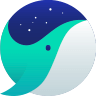
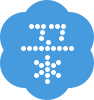

In [4]:
# request는 브라우저를 켜는 것과 같다.

res = req.get('https://www.naver.com')
res.text

### BeautifulSoup으로 객체화를 진행해줘야 함

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
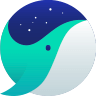
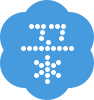

In [6]:
soup = bs(res.text, 'lxml')
soup

#### f12 개발자 모드로 요소들을 확인해보기

#### CSS Selector는 어떤 것이 있을까?
1. tag selector('태그이름') -> google, youtube 실습 때 사용
2. id selector(#)
3. class selector(.) -> 네이버 메일 실습 때 사용
4. child selector(>)
5. parent selector(&)
6. adjacent selector(+)
7. General Sibling(일반형제) selector (~)

In [7]:
# 그럼 이제 메뉴들을 뽑아볼까?
    # 메뉴들 -> select
    # 우리에게 a란 tag 이름과, nav란 class 이름이 주어졌다.
naver_menus = soup.select('a.nav')
naver_menus

[<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>,
 <a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a>,
 <a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a>,
 <a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a>,
 <a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a>,
 <a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a>,
 <a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a>,
 <a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>,
 <a class="nav" data-clk="svc.dic" href="https://dict.naver.com/">사전</a>,
 <a class="nav" data-clk="svc.news" href="https://news.naver.com/">뉴스</a>,
 <a class="nav" data-clk="svc.stock" href="https://finance.naver.com/">증권</a>,


In [9]:
# 인덱싱으루 메일요소 뽑기
    #텍스트 데이터로 변환
    
naver_menu_mail = soup.select('a.nav')[0].text
naver_menu_mail

'메일'

In [12]:
# for loop으로 추출을 해보자
for i in range(len(naver_menus)):
    print(soup.select('a.nav')[i].text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV
사전
뉴스
증권
부동산
지도
VIBE
도서
웹툰


### naver 날씨에서 온도 데이터 수집

In [13]:
res_weather = req.get('https://search.naver.com/search.naver?where=nexearch&sm=top_sug.pre&fbm=1&acr=5&acq=%EC%98%A4%EB%8A%98%EC%9D%98+%EB%82%A0%EC%94%A8&qdt=0&ie=utf8&query=%EC%98%A4%EB%8A%98%EC%9D%98+%EB%82%A0%EC%94%A8')
res_weather

<Response [200]>

### beautifulsoup을 사용하기 위해 객체화 진행


In [15]:
soup = bs(res_weather.text, 'lxml')
soup

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="오늘의 날씨 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'오늘의 날씨'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'오늘의 날씨'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>오늘의 날씨 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230427.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic

In [19]:
# 원하는 데이터가 하나?
    #그러면 select_one을 사용해도 무방
temperature = soup.select('div.temperature_text > strong')
temperature[0].text

'현재 온도17.4°'

### NAVER NEWS 기사제목 가져오기

In [20]:
# res_naver_news as rnn = req.get('https://search.naver.com/search.naver?sm=tab_hty.top&where=news&query=%EB%9F%AC%EC%8B%9C%EC%95%84+%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98+%EC%A0%84%EC%9F%81&oquery=%EB%84%A4%EC%9D%B4%EB%B2%84+%EC%9A%B0%EB%9F%AC%EC%8B%9C%EC%95%84%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98+%EC%A0%84%EC%9F%81&tqi=iZ8E7lp0YiRssCcyJPsssssstDG-288886')

url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=news&query=%EB%9F%AC%EC%8B%9C%EC%95%84+%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98+%EC%A0%84%EC%9F%81&oquery=%EB%84%A4%EC%9D%B4%EB%B2%84+%EC%9A%B0%EB%9F%AC%EC%8B%9C%EC%95%84%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98+%EC%A0%84%EC%9F%81&tqi=iZ8E7lp0YiRssCcyJPsssssstDG-288886'
res_news = req.get(url)
res_news

<Response [200]>

In [25]:
soup_news = bs(res_news.text, 'lxml')

In [27]:
article = soup_news.select_one('a.news_tit')
article.text

'KT, 러시아 IDC 법인 1년만에 철수… 우크라이나 전쟁 여파'

### 기사들을 뽑아오기
- select 함수로
- for문 (for loop)을 이용해서 추출

In [28]:
articles = soup_news.select('a.news_tit')

In [32]:
articles[0].text

<a class="news_tit" href="https://biz.chosun.com/it-science/ict/2023/04/30/CMTCRZL7RJA4PAPD7LA4PINQGQ/?utm_source=naver&amp;utm_medium=original&amp;utm_campaign=biz" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=1&amp;i=88127058_000000000000000000897971&amp;g=366.0000897971&amp;u='+urlencode(this.href));" target="_blank" title="KT, 러시아 IDC 법인 1년만에 철수… 우크라이나 전쟁 여파">KT, <mark>러시아</mark> IDC 법인 1년만에 철수… <mark>우크라이나 전쟁</mark> 여파</a>

In [33]:
len(articles)

10

In [35]:
# for loop으로 기사들 추출
for i in range(len(articles)):
    print(articles[i].text)

KT, 러시아 IDC 법인 1년만에 철수… 우크라이나 전쟁 여파
교황 "우크라 전쟁 종식 위한 비밀 임무 수행 중"
우크라전 장기화에… 2023년 1분기 러시아인 난민 신청 건수 1위
유엔식량농업기구 "러-우 전쟁, 세계 식량안보에 파괴적인 영향"
“북한, 러시아 용병 회사에 포탄 1만발 제공 예정”
우크라 대반격 임박...러시아 대규모 방어망 구축
KT, 러시아 IDC법인 철수…"우크라이나 전쟁 탓"
시진핑은 왜 우크라이나 젤렌스키와 통화했을까
러시아, 유류시설 공격 인정…"봄철 대반격의 서막"
[단독] 현대차, '脫 러시아' 계획 수립…현대모비스·위아는 '부품 공급' 유지...


In [36]:
articles[3].text

'유엔식량농업기구 "러-우 전쟁, 세계 식량안보에 파괴적인 영향"'

### 개인실습
1. 네이버 창-> 원하는 키워드 검색
2. 뉴스 탭으로 이동해서
3. beautifulsoup으로 뽑아보고 그 중 하나의 기사를 추출

In [37]:
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=news&query=ai&oquery=%EB%9F%AC%EC%8B%9C%EC%95%84+%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98+%EC%A0%84%EC%9F%81&tqi=iZ8Enlp0JXVsshdwnY8ssssssQs-167018'
ai_news = req.get(url)
ai_news

<Response [200]>

In [41]:
bs_ai = bs(ai_news.text, 'lxml')
bs_ai.text

'         ai : 네이버 뉴스검색         메뉴 영역으로 바로가기 본문 영역으로 바로가기       NAVER   검색                  한글 입력기     자동완성 레이어     최근검색어  전체삭제       @txt@   @date@. 삭제    검색어 저장 기능이 꺼져 있습니다.설정이 초기화 된다면 도움말을 확인해주세요. 최근 검색어 내역이 없습니다.설정이 초기화 된다면 도움말을 확인해주세요.    도움말    자동저장 끄기           @5@회 로또당첨번호  동행복권 제공     @6@@7@@8@@9@@10@@11@@12@       @14@  @txt@@currency@  @8@(@9@%)    @6@원        @txt@  @7@, @message@     @7@ @8@°         @txt@  @5@    바로가기       @txt@   추가     @txt@   @date@. 추가      @query@ @intend@   추가          자세히보기      관심사를 반영한 컨텍스트 자동완성도움말   컨텍스트 자동완성   컨텍스트 자동완성  ON/OFF 설정은해당기기(브라우저)에 저장됩니다.  자세히    동일한 시간대/연령/남녀별 사용자 그룹의관심사에 맞춰 자동완성을 제공합니다.  로그인 자세히   컨텍스트 자동완성 레이어 닫기      도움말 신고    자동완성 끄기        검색            통합어학사전뉴스이미지VIEW지식iN인플루언서동영상쇼핑지도     더보기    도서뮤직지식백과오디오클립학술정보  검색옵션        공유      ai 뉴스검색 결과                        관련도순 최신순 오래된순  옵션   검색옵션 닫기    정렬  관련도순 최신순 오래된순    기간  전체 1시간옵션펼치기접기 1일 1주 1개월 3개월 6개월 1년 직접입력옵션펼치기접기    시간선택     1시간 2시간 3시간 4시간 5시간 6시간     기간 설정시작       기간 설정끝

In [53]:
article_ai = bs_ai.select('a.news_tit')
article_ai

[<a class="news_tit" href="https://www.yna.co.kr/view/AKR20230501043700017?input=1195m" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=1&amp;i=880000D8_000000000000000013914002&amp;g=001.0013914002&amp;u='+urlencode(this.href));" target="_blank" title='카톡 AI챗봇 아숙업 "음식 사진 찍어올리면 영양정보 분석"'>카톡 <mark>AI</mark>챗봇 아숙업 "음식 사진 찍어올리면 영양정보 분석"</a>,
 <a class="news_tit" href="https://zdnet.co.kr/view/?no=20230429203811" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=6&amp;i=8800011E_000000000000000002290698&amp;g=092.0002290698&amp;u='+urlencode(this.href));" target="_blank" title="AI데이터 310종 올해 추가 개방···역대 최대 규모"><mark>AI</mark>데이터 310종 올해 추가 개방···역대 최대 규모</a>,
 <a class="news_tit" href="https://biz.chosun.com/international/international_economy/2023/04/30/W2MKMISQG5HDNHUI6HZ7F2NIAY/?utm_source=naver&amp;utm_medium=original&amp;utm_campaign=biz" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=11&amp;i=88127058_000000000000000000897984&amp;g=366.0000897984&amp;u='+urlencode(this.href));"

In [56]:
article_ai[1].text

'AI데이터 310종 올해 추가 개방···역대 최대 규모'

<a class="news_tit" href="https://www.yna.co.kr/view/AKR20230501043700017?input=1195m" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=1&amp;i=880000D8_000000000000000013914002&amp;g=001.0013914002&amp;u='+urlencode(this.href));" target="_blank" title='카톡 AI챗봇 아숙업 "음식 사진 찍어올리면 영양정보 분석"'>카톡 <mark>AI</mark>챗봇 아숙업 "음식 사진 찍어올리면 영양정보 분석"</a>
<a class="news_tit" href="https://zdnet.co.kr/view/?no=20230429203811" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=6&amp;i=8800011E_000000000000000002290698&amp;g=092.0002290698&amp;u='+urlencode(this.href));" target="_blank" title="AI데이터 310종 올해 추가 개방···역대 최대 규모"><mark>AI</mark>데이터 310종 올해 추가 개방···역대 최대 규모</a>
<a class="news_tit" href="https://biz.chosun.com/international/international_economy/2023/04/30/W2MKMISQG5HDNHUI6HZ7F2NIAY/?utm_source=naver&amp;utm_medium=original&amp;utm_campaign=biz" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=11&amp;i=88127058_000000000000000000897984&amp;g=366.0000897984&amp;u='+urlencode(this.href));" targ